In [1]:
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import os
import matplotlib.pyplot as plt

In [3]:
def mismatch_counter(mol):
    count = 0
    _, T, B = otm.tl.process_molecule(mol)
    for i in range(len(T)):
        if T[i] == 'O' and i % 3 == 0:
            if B[i,i+1] != 1 or B[i,i+2] != 1:
                count += 1
        if T[i] == 'O' and i % 3 == 1:
            if B[i,i-1] != 1 or B[i,i+1] != 1:
                count += 1
        if T[i] == 'O' and i % 3 == 2:
            if B[i,i-1] != 1 or B[i,i-2] != 1:
                count += 1
    return count

In [13]:
data_path = "../Data/Water-Clusters"
mol_pair_list_path = os.path.join(data_path, 'list')
molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='water cluster')
result = []
for nameA, nameB in molecule_pairs:
    filename = nameB + '-aligned_to-' + nameA + '.xyz'
    mol = next(pybel.readfile('xyz', os.path.join('./ArbAlignOutput', filename)))
    result.append({
        'nameA': nameA,
        'nameB': nameB,
        '# mismatched water molecules': mismatch_counter(mol)
    })
    print(nameA, nameB, mismatch_counter(mol))
mismatch_count_df = pd.DataFrame(result)
mismatch_count_df.to_csv('./ArbAlignOutput/ArbAlignData_mismatch_count.csv', index=False)

2-Cs-1 2-OpenC1 0
3-UUD 3-UUU 0
4-Ci 4-S4 2
5-CA-A 5-CA-B 0
6-BAG 6-BK-1 5
7-BI1 7-BI2 0
8-D2d 8-S4 4
9-D2dDD 9-S4DA 5
10-PP1 10-PP2 5
11-551A-1 11-551A-4 3
12-D2d-1-L 12-D2d-1-R 8
13-TIP4P 13-TIP5P 8
14-1 14-2 14
15-1 15-2 10
16-TIP4P 16-TIP5P 14
17-TIP4P 17-TIP5P 12
18-TIP4P 18-TIP5P 14
19-TIP4P 19-TIP5P 13
20-TIP4P 20-TIP5P 18
21-TIP4P 21-TIP5P 18
25-1 25-2 18
40-a 40-b 32
60-1 60-2 44
100-1 100-2 70


In [5]:
group1_info = pd.read_csv('../Data/Our_Benchmark_20250410_ver1/Water_Cluster_3_30/water_cluster_1st_2nd_lowest_energy.csv')
result = []
for nameA, nameB in zip(group1_info['Reference'], group1_info['Target']):
    filename = nameB.split(".")[0] + '-aligned_to-' + nameA.split(".")[0] + '.xyz'
    mol = next(pybel.readfile('xyz', os.path.join('./ArbAlignOutput', filename)))
    result.append({
        'nameA': nameA,
        'nameB': nameB,
        '# mismatched water molecules': mismatch_counter(mol)
    })
    print(nameA, nameB, mismatch_counter(mol))
mismatch_count_df = pd.DataFrame(result)
mismatch_count_df.to_csv('./ArbAlignOutput/1st2nd_mismatch_count.csv', index=False)

Wat_3_cluster_0_1st_lowest.xyz Wat_3_cluster_1_2nd_lowest.xyz 0
Wat_4_cluster_2_1st_lowest.xyz Wat_4_cluster_3_2nd_lowest.xyz 0
Wat_5_cluster_12_1st_lowest.xyz Wat_5_cluster_13_2nd_lowest.xyz 0
Wat_6_cluster_31_1st_lowest.xyz Wat_6_cluster_32_2nd_lowest.xyz 2
Wat_7_cluster_137_1st_lowest.xyz Wat_7_cluster_138_2nd_lowest.xyz 0
Wat_8_cluster_607_1st_lowest.xyz Wat_8_cluster_608_2nd_lowest.xyz 6
Wat_9_cluster_1184_1st_lowest.xyz Wat_9_cluster_1185_2nd_lowest.xyz 5
Wat_10_cluster_5310_1st_lowest.xyz Wat_10_cluster_5311_2nd_lowest.xyz 7
Wat_11_cluster_33413_1st_lowest.xyz Wat_11_cluster_33414_2nd_lowest.xyz 4
Wat_12_cluster_43582_1st_lowest.xyz Wat_12_cluster_43583_2nd_lowest.xyz 9
Wat_13_cluster_86223_1st_lowest.xyz Wat_13_cluster_86224_2nd_lowest.xyz 9
Wat_14_cluster_144675_1st_lowest.xyz Wat_14_cluster_144676_2nd_lowest.xyz 11
Wat_15_cluster_225208_1st_lowest.xyz Wat_15_cluster_225209_2nd_lowest.xyz 8
Wat_16_cluster_321028_1st_lowest.xyz Wat_16_cluster_321029_2nd_lowest.xyz 7
Wat_17_clus

In [6]:
group2_info = pd.read_csv('../Data/Our_Benchmark_20250410_ver1/Water_Cluster_3_30/water_cluster_largest_RMSD_pair_among_20_lowest_energy.csv')
result = []
for nameA, nameB in zip(group2_info['Reference'], group2_info['Target']):
    filename = nameB.split(".")[0] + '-aligned_to-' + nameA.split(".")[0] + '.xyz'
    mol = next(pybel.readfile('xyz', os.path.join('./ArbAlignOutput', filename)))
    result.append({
        'nameA': nameA,
        'nameB': nameB,
        '# mismatched water molecules': mismatch_counter(mol)
    })
    print(nameA, nameB, mismatch_counter(mol))
mismatch_count_df = pd.DataFrame(result)
mismatch_count_df.to_csv('./ArbAlignOutput/largestRMSD_mismatch_count.csv', index=False)

Wat_3_cluster_0_lowest_1.xyz Wat_3_cluster_1_lowest_2.xyz 0
Wat_4_cluster_2_lowest_1.xyz Wat_4_cluster_10_lowest_9.xyz 2
Wat_5_cluster_13_lowest_2.xyz Wat_5_cluster_22_lowest_11.xyz 2
Wat_6_cluster_42_lowest_12.xyz Wat_6_cluster_50_lowest_20.xyz 5
Wat_7_cluster_137_lowest_1.xyz Wat_7_cluster_147_lowest_11.xyz 6
Wat_8_cluster_615_lowest_9.xyz Wat_8_cluster_616_lowest_10.xyz 8
Wat_9_cluster_1184_lowest_1.xyz Wat_9_cluster_1195_lowest_12.xyz 8
Wat_10_cluster_5323_lowest_14.xyz Wat_10_cluster_5324_lowest_15.xyz 9
Wat_11_cluster_33413_lowest_1.xyz Wat_11_cluster_33415_lowest_3.xyz 10
Wat_12_cluster_43582_lowest_1.xyz Wat_12_cluster_43599_lowest_18.xyz 10
Wat_13_cluster_86223_lowest_1.xyz Wat_13_cluster_86236_lowest_14.xyz 13
Wat_14_cluster_144683_lowest_9.xyz Wat_14_cluster_144693_lowest_19.xyz 13
Wat_15_cluster_225216_lowest_9.xyz Wat_15_cluster_225222_lowest_15.xyz 14
Wat_16_cluster_321029_lowest_2.xyz Wat_16_cluster_321036_lowest_9.xyz 15
Wat_17_cluster_417889_lowest_3.xyz Wat_17_cluster

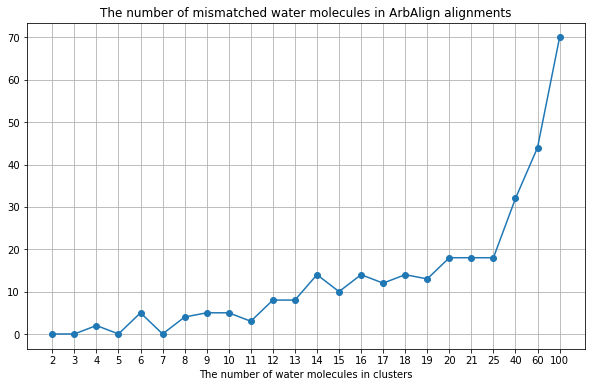

<Figure size 432x288 with 0 Axes>

In [17]:
mismatch_count_df = pd.read_csv('./ArbAlignOutput/ArbAlignData_mismatch_count.csv')
arbalign_res = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+')
df = pd.concat([mismatch_count_df, arbalign_res], axis=1)
plt.figure(figsize=(10, 6))
plt.title('The number of mismatched water molecules in ArbAlign alignments')
plt.xlabel('The number of water molecules in clusters')
plt.plot(range(len(df)), df["# mismatched water molecules"], marker='o')
plt.xticks(range(len(df)), df['#'])
plt.grid()
plt.show()
plt.savefig('../images/ArbAlignData_mismatch_count.png')

,#,Isomers_aligned,RMSD(Conv),RMSD(KM-ByAtomName)
0,2,2-Cs-1_2-OpenC1,0.875,0.316
1,3,3-UUD_3-UUU_3,1.055,0.310
2,4,4-Ci_4-S4_4,0.494,0.494
3,5,5-CA-A_5-CA-B_5,1.464,0.756
4,6,6-BAG_6-BK-1_6,2.341,1.187
5,7,7-BI1_7-BI2_7,3.125,0.450
6,8,8-D2d_8-S4_8,2.794,0.372
7,9,9-D2dDD_9-S4DA_9,2.588,0.365
8,10,10-PP1_10-PP2_10,3.266,0.338
9,11,11-551A-1_11-551A-4_11,2.878,0.958


In [3]:
data_path1 = "../Data/Water-Clusters"
data_path2 = "./ArbAlignOutput"
nameA = '10-PP1.xyz'
nameB = '10-PP2-aligned_to-10-PP1.xyz'
molA = next(pybel.readfile('xyz', os.path.join(data_path1, nameA)))
molB = next(pybel.readfile('xyz', os.path.join(data_path2, nameB)))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
X_B_aligned, _, _ = otm.tl.molecule_alignment_allow_reflection(X_A, X_B, np.eye(30))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment=None, nameA=nameA, nameB=nameB, save=True)

The assignment is not provided. Assuming identity assignment.
